In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/isaacp/research/repos/EvMatsim/contribs/ev/scenarios/utahev/bestoutput/ITERS/it.0/0.countscompare.txt', sep='\t')
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,12975,407,1,0,735,-1.000,1.000,38.341
1,12975,407,2,3,451,-0.993,0.993,29.735
2,12975,407,3,0,488,-1.000,1.000,31.241
3,12975,407,4,1,585,-0.998,0.998,34.118
4,12975,407,5,1,1278,-0.999,0.999,50.498


In [3]:
df['Link Id'].unique()

array([12975,  6086])

In [8]:
link = 6086
dflink = df[df['Link Id'] == link]
dflink.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
24,6086,3103218,1,1,615,-0.998,0.998,34.986
25,6086,3103218,2,2,411,-0.995,0.995,28.462
26,6086,3103218,3,0,310,-1.000,1.000,24.900
27,6086,3103218,4,1,442,-0.998,0.998,29.631
28,6086,3103218,5,1,1056,-0.999,0.999,45.891


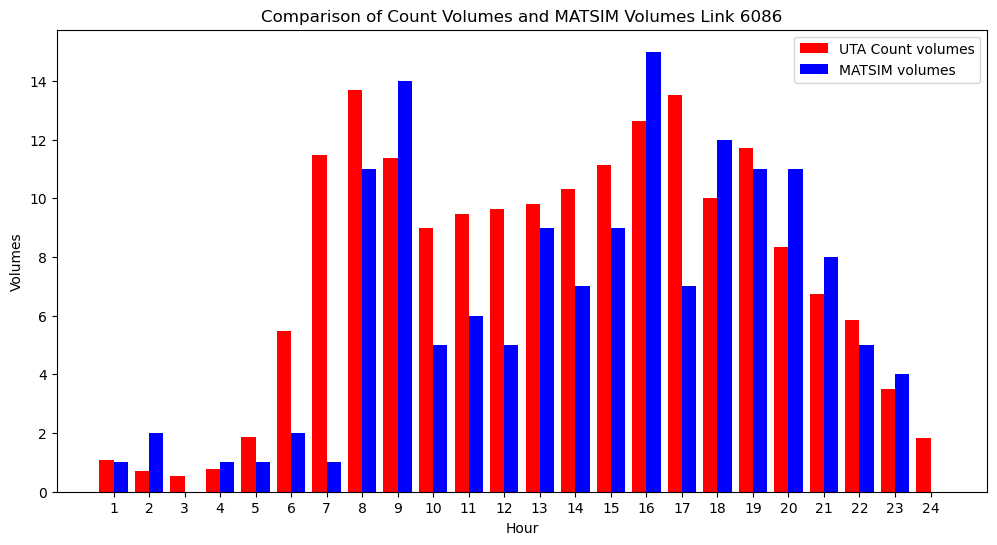

In [9]:
unique_hours = pd.unique(dflink['Hour'])
bar_width = 0.4  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot Count volumes histogram
plt.bar(r1, dflink['Count volumes'] * 0.0146 * 0.12, color='red', width=bar_width, label='UTA Count volumes')

# Plot MATSIM volumes histogram
plt.bar(r2, dflink['MATSIM volumes'], color='blue', width=bar_width, label='MATSIM volumes')

# Labels, title, and legend
plt.xlabel('Hour')
plt.ylabel('Volumes')
plt.title(f'Comparison of Count Volumes and MATSIM Volumes Link {link}')
plt.xticks([r + bar_width / 2 for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()